In [4]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pandas as pd

In [7]:
# CTD 데이터
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sea/data/CTD/현장조사자료.csv', encoding="UTF-8")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sstn    392 non-null    object 
 1   sdep    392 non-null    int64  
 2   stmp    392 non-null    float64
 3   ssal    392 non-null    float64
 4   sden    392 non-null    float64
 5   spHa    392 non-null    float64
 6   stub    392 non-null    float64
 7   sflu    392 non-null    float64
 8   ssig    392 non-null    float64
 9   oxys    392 non-null    float64
 10  oxyc    392 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 33.8+ KB


,sstn,sdep,stmp,ssal,sden,spHa,stub,sflu,ssig,oxys,oxyc
0,St.1,1,24.166200,32.408900,1021.638000,9.139500,3.911350,1.671250,21.632350,93.278500,4.550200
1,St.1,2,24.169157,32.409829,1021.641000,9.139571,0.413857,1.686200,21.632157,98.182857,4.789171
2,St.1,3,24.173420,32.399820,1021.636360,9.139600,0.477920,1.679240,21.623380,91.215400,4.449220
3,St.1,4,24.181357,32.410657,1021.646929,9.139500,0.470100,1.646807,21.629207,101.966429,4.972650
4,St.1,5,24.189100,32.410180,1021.648020,9.139600,0.543520,1.616060,21.626600,102.514400,4.998720


In [8]:
df.describe()

,sdep,stmp,ssal,sden,spHa,stub,sflu,ssig,oxys,oxyc
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,35.012755,18.377780,33.190897,1023.909432,9.088718,0.943103,0.442605,23.753948,73.189163,3.920062
std,21.739856,3.262204,1.099302,1.717146,0.053401,2.838726,0.512400,1.641557,14.724398,0.595958
min,1.000000,15.003750,29.931000,1019.012450,9.007000,0.061020,0.021940,19.006750,55.801000,3.112600
25%,17.000000,15.932889,32.558272,1022.952333,9.051300,0.235686,0.094244,22.888784,61.127619,3.397919
50%,33.000000,17.206800,33.506269,1024.595857,9.073533,0.461277,0.193575,24.430019,68.350864,3.814925
75%,50.250000,19.967821,33.994060,1025.231606,9.122000,0.908579,0.631356,25.046518,87.197714,4.354793
max,83.000000,26.785300,34.411000,1025.746278,9.219579,52.068000,2.479200,25.433667,117.861500,5.945800


### sstn에서 St.1	만 추출

In [9]:
df1 = df[ df.sstn == 'St.1' ]
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sstn    48 non-null     object 
 1   sdep    48 non-null     int64  
 2   stmp    48 non-null     float64
 3   ssal    48 non-null     float64
 4   sden    48 non-null     float64
 5   spHa    48 non-null     float64
 6   stub    48 non-null     float64
 7   sflu    48 non-null     float64
 8   ssig    48 non-null     float64
 9   oxys    48 non-null     float64
 10  oxyc    48 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.5+ KB


,sstn,sdep,stmp,ssal,sden,spHa,stub,sflu,ssig,oxys,oxyc
0,St.1,1,24.166200,32.408900,1021.638000,9.139500,3.911350,1.671250,21.632350,93.278500,4.550200
1,St.1,2,24.169157,32.409829,1021.641000,9.139571,0.413857,1.686200,21.632157,98.182857,4.789171
2,St.1,3,24.173420,32.399820,1021.636360,9.139600,0.477920,1.679240,21.623380,91.215400,4.449220
3,St.1,4,24.181357,32.410657,1021.646929,9.139500,0.470100,1.646807,21.629207,101.966429,4.972650
4,St.1,5,24.189100,32.410180,1021.648020,9.139600,0.543520,1.616060,21.626600,102.514400,4.998720


read me.txt에 항목에 대한 설명이 있음 
sstn: station number  
sdep: Depth [m]  
stmp: Temperature [deg C]   
ssal: Salinity, Practical [PSU]   
sden: Density [kg/m^3]   
spHa: ph: pH   
stub: Turbidity, WET Labs ECO [NTU]  
sflu: Fluorescence [mg/m^3]   
ssig: Sigma-t [kg/m^3 ]    
oxys: Oxygen [% saturation]   
oxyc: Oxygen [ml/l]   

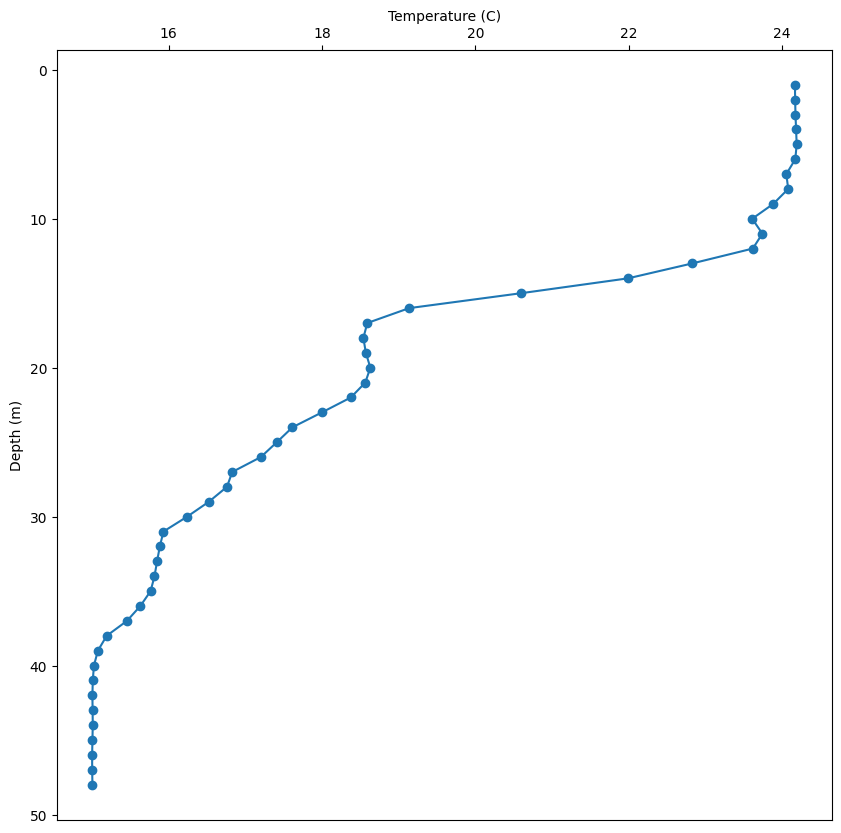

In [10]:
fig1 = plt.figure( figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.plot(df1.stmp, df1.sdep,'o-')
 
# Draw x label
ax1.set_xlabel('Temperature (C)')
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax1.xaxis.tick_top() # ANOTHER way to move the ticks to the top
 
# Draw y label
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(ax1.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
 
plt.show()

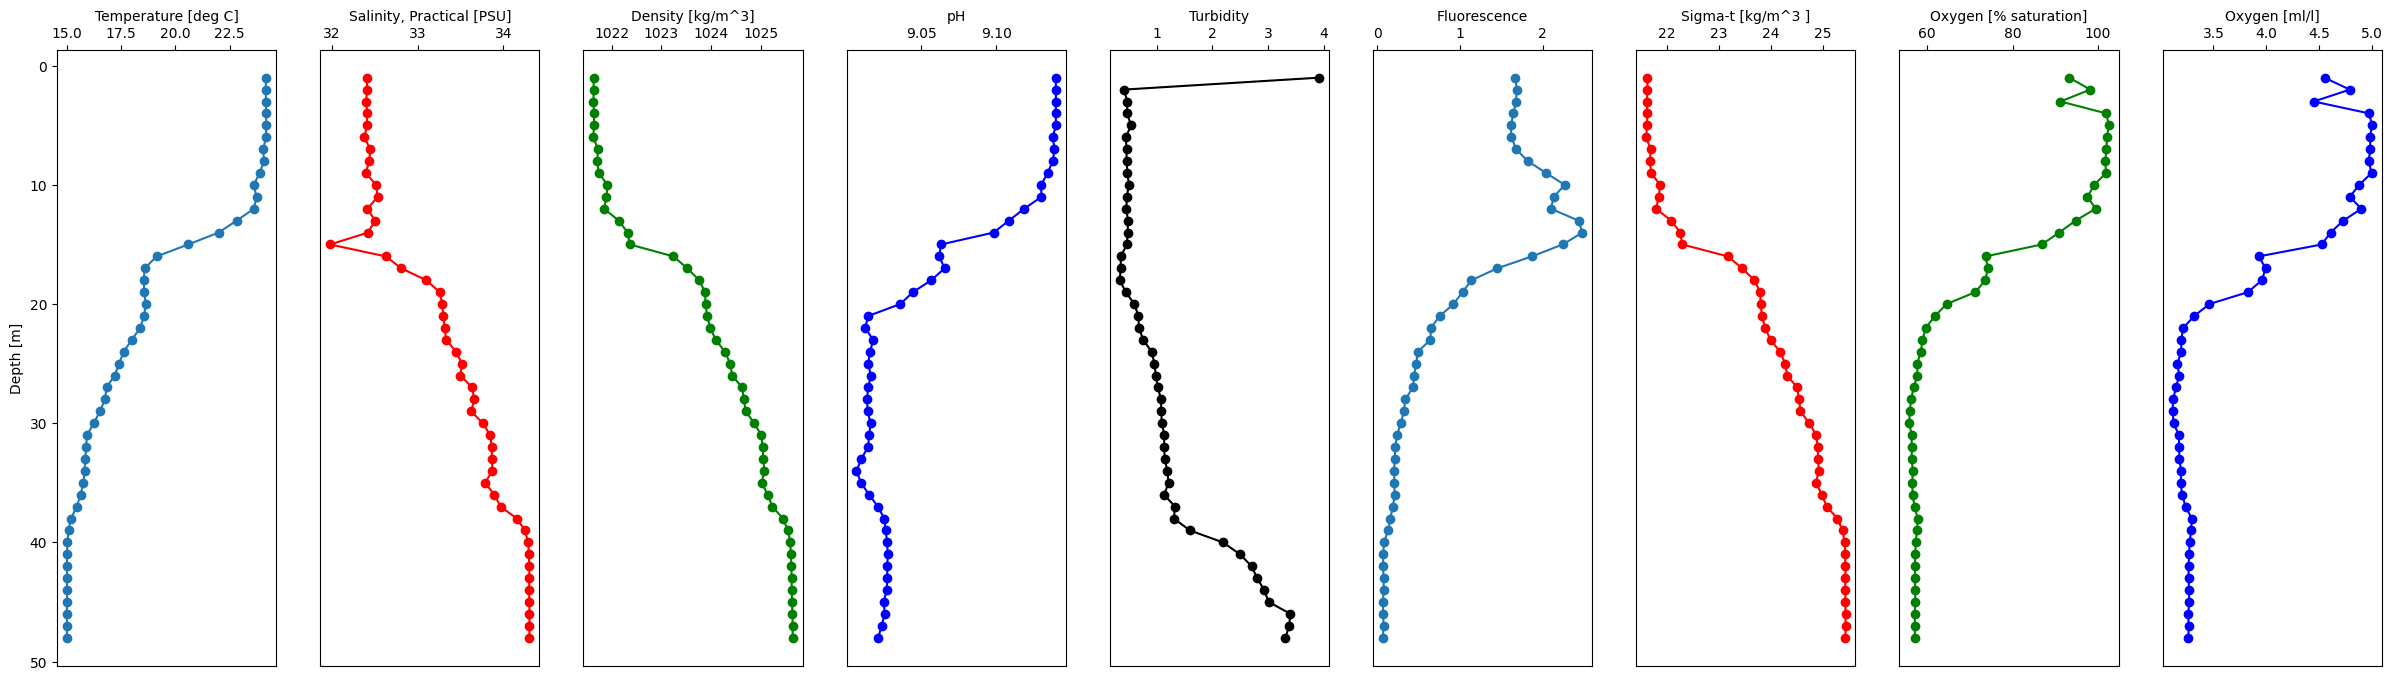

In [11]:
# Three-panel plot
fig2, (ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1,9,sharey=True, figsize=(30, 8))

# Temperature
ax2.plot(df1.stmp, df1.sdep,'o-')
ax2.set_ylabel('Depth [m]')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Temperature [deg C]')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top

# Salinity
ax3.plot(df1.ssal, df1.sdep,'o-r')
ax3.set_xlabel('Salinity, Practical [PSU]')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks

# Density
ax4.plot(df1.sden, df1.sdep,'o-g')
ax4.set_xlabel('Density [kg/m^3]')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax4.yaxis.set_visible(False) # This erases the y ticks

# pH
ax5.plot(df1.spHa, df1.sdep,'o-b')
ax5.set_xlabel('pH')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax5.yaxis.set_visible(False) # This erases the y ticks

# Turbidity
ax6.plot(df1.stub, df1.sdep,'o-k')
ax6.set_xlabel('Turbidity')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.yaxis.set_visible(False) # This erases the y ticks

# Fluorescence
ax7.plot(df1.sflu, df1.sdep,'o-')
ax7.set_xlabel('Fluorescence')
ax7.xaxis.set_label_position('top') # this moves the label to the top
ax7.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax7.yaxis.set_visible(False) # This erases the y ticks

# Sigma-t [kg/m^3 ]
ax8.plot(df1.ssig, df1.sdep,'o-r')
ax8.set_xlabel('Sigma-t [kg/m^3 ]')
ax8.xaxis.set_label_position('top') # this moves the label to the top
ax8.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax8.yaxis.set_visible(False) # This erases the y ticks

# Oxygen [% saturation]
ax9.plot(df1.oxys, df1.sdep,'o-g')
ax9.set_xlabel('Oxygen [% saturation]')
ax9.xaxis.set_label_position('top') # this moves the label to the top
ax9.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax9.yaxis.set_visible(False) # This erases the y ticks

# Oxygen [ml/l]
ax10.plot(df1.oxyc, df1.sdep,'o-b')
ax10.set_xlabel('Oxygen [ml/l]')
ax10.xaxis.set_label_position('top') # this moves the label to the top
ax10.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax10.yaxis.set_visible(False) # This erases the y ticks

fig = plt.gcf()
plt.savefig("/content/gdrive/My Drive/Colab Notebooks/sea/result/CTD_St.1.png", bbox_inches='tight', pad_inches=0.01)

In [12]:
df1.head()

,sstn,sdep,stmp,ssal,sden,spHa,stub,sflu,ssig,oxys,oxyc
0,St.1,1,24.166200,32.408900,1021.638000,9.139500,3.911350,1.671250,21.632350,93.278500,4.550200
1,St.1,2,24.169157,32.409829,1021.641000,9.139571,0.413857,1.686200,21.632157,98.182857,4.789171
2,St.1,3,24.173420,32.399820,1021.636360,9.139600,0.477920,1.679240,21.623380,91.215400,4.449220
3,St.1,4,24.181357,32.410657,1021.646929,9.139500,0.470100,1.646807,21.629207,101.966429,4.972650
4,St.1,5,24.189100,32.410180,1021.648020,9.139600,0.543520,1.616060,21.626600,102.514400,4.998720


In [27]:
import plotly.express as px

fig = px.line_3d(df1, x="stmp", y="stmp", z="sdep")
fig.update_layout(width=800, height=700,
                 scene={'zaxis': {'autorange': 'reversed'} }    # reverse automatically
                 )
fig.show()